In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import hvplot.xarray
import hvplot
import cmocean

import matplotlib as mpl

hvplot.output(widget_location='bottom')

from helpers_mom6.collection_of_experiments import CollectionOfExperiments
from helpers_mom6.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, gaussian_remesh
from helpers.plot_helpers import *

import warnings
warnings.filterwarnings("ignore")


%load_ext autoreload
%autoreload 3

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [3]:
directory = "/scratch/pp2681/mom6/Apr2023/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [4]:
directory = "/scratch/pp2681/mom6/CM26_Double_Gyre/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

Error, cannot find files in folder/scratch/pp2681/mom6/CM26_Double_Gyre/generalization/ANN_CM26_grid_harmonic_ver3-R4/ZB-1.0-FCT-3-test/output


In [5]:
directory = "/scratch/pp2681/mom6/CM26_Double_Gyre/collocated-vs-staggered"
ds += CollectionOfExperiments.init_folder(directory, additional_subfolder='output')

In [6]:
ds.remesh('R64', 'R4')

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4


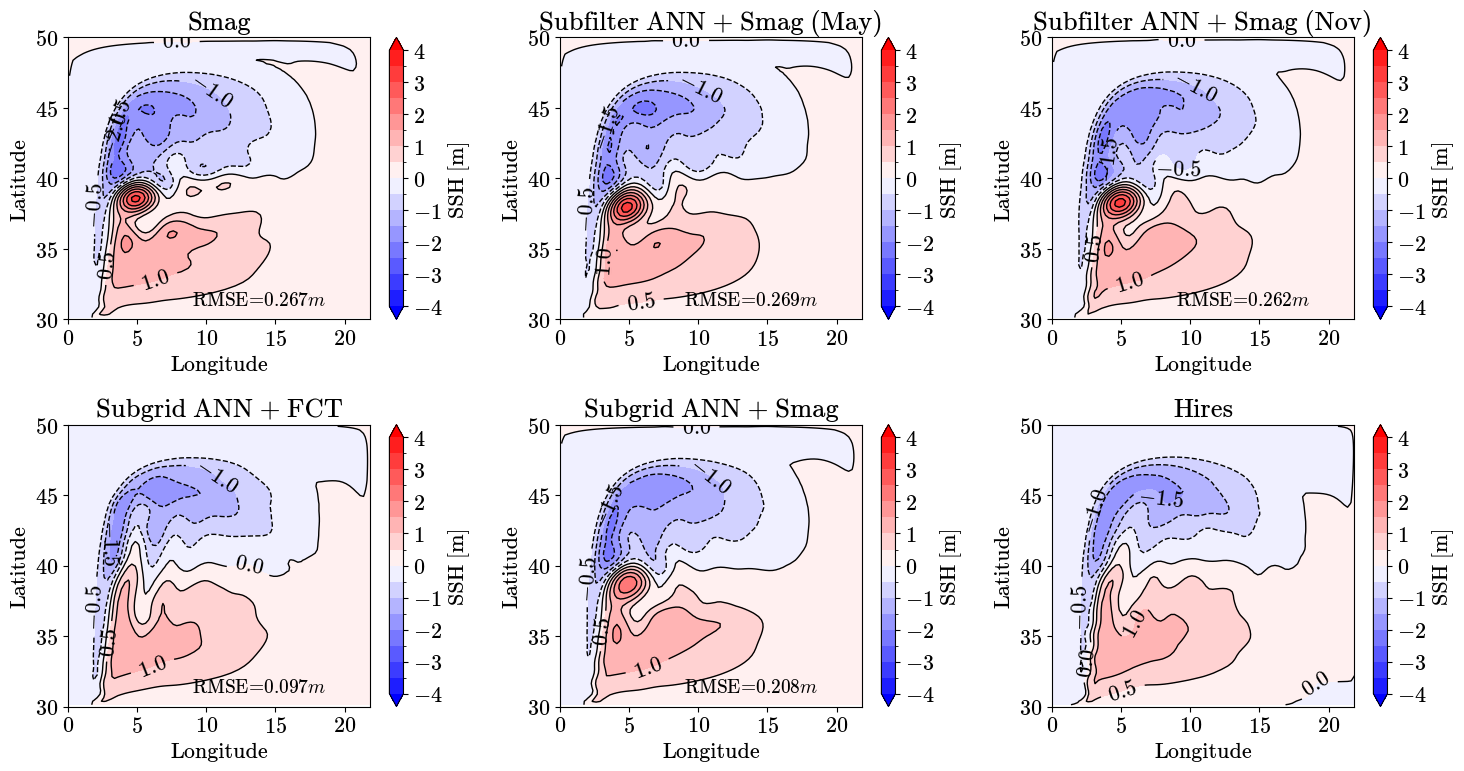

In [17]:
ds.plot_ssh(['R4', 'collocated', 'hdn-64-64-R4-ZB-1.0-Cs-0.06', 
             'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT-3', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.06', 'R64_R4'], 
            ['Smag', 'Subfilter ANN + Smag (May)', 'Subfilter ANN + Smag (Nov)', 'Subgrid ANN + FCT', 'Subgrid ANN + Smag', 'Hires'])

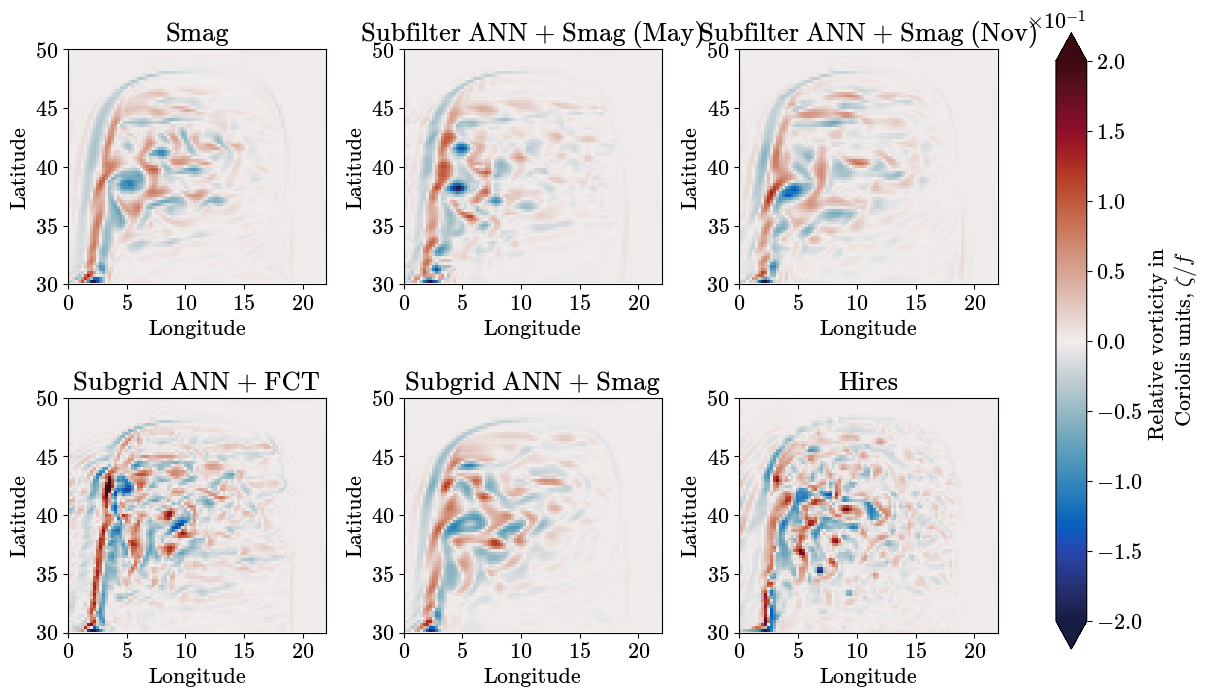

In [16]:
ds.plot_RV(['R4', 'collocated', 'hdn-64-64-R4-ZB-1.0-Cs-0.06', 
             'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT-3', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.06', 'R64_R4'], 
            ['Smag', 'Subfilter ANN + Smag (May)', 'Subfilter ANN + Smag (Nov)', 'Subgrid ANN + FCT', 'Subgrid ANN + Smag', 'Hires'])

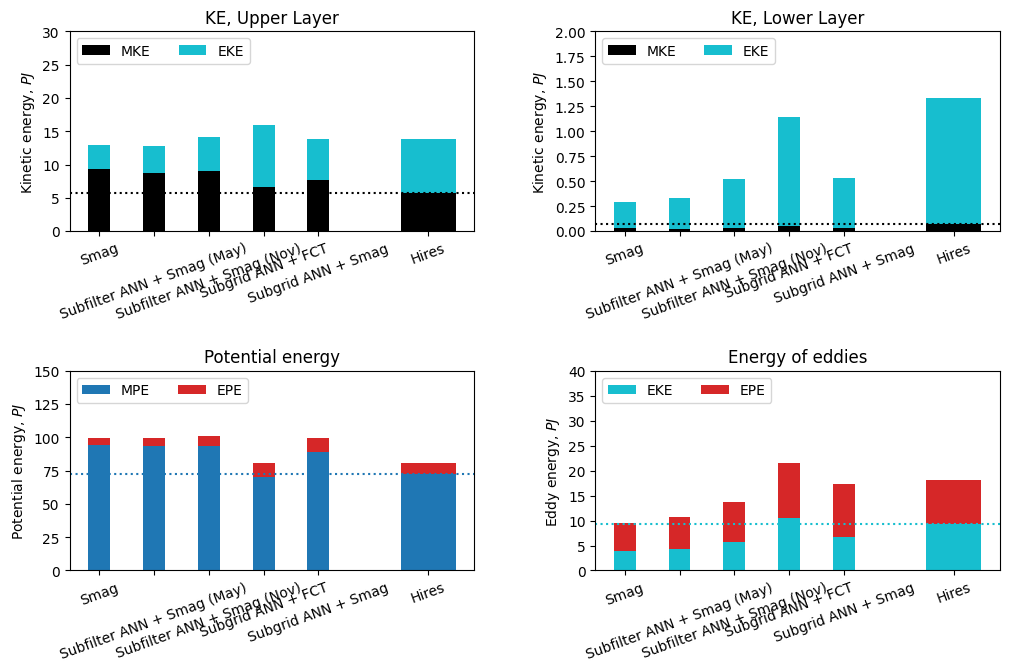

In [10]:
ds.plot_KE_PE(['R4', 'collocated', 'hdn-64-64-R4-ZB-1.0-Cs-0.06', 
             'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT-3', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.06', 'R64_R4'], 
            ['Smag', 'Subfilter ANN + Smag (May)', 'Subfilter ANN + Smag (Nov)', 'Subgrid ANN + FCT', 'Subgrid ANN + Smag', 'Hires'])

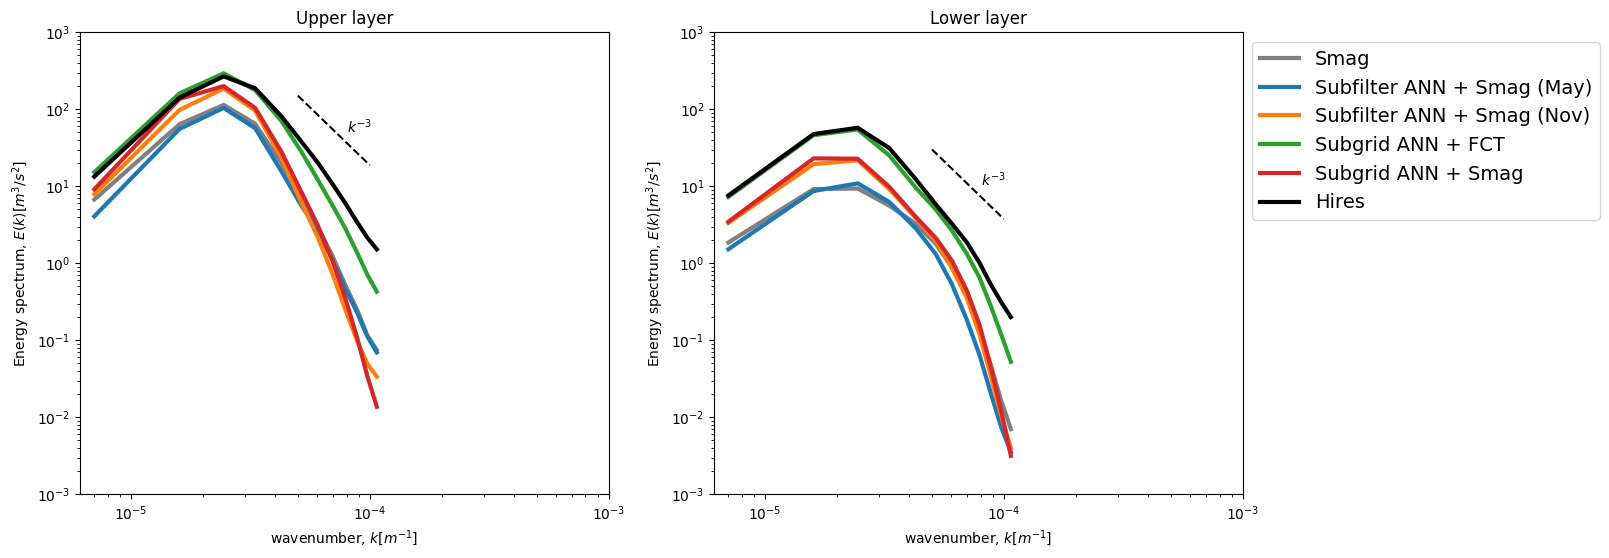

In [11]:
ds.plot_KE_spectrum(['R4', 'collocated', 'hdn-64-64-R4-ZB-1.0-Cs-0.06', 
             'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT-3', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.06', 'R64_R4'], 
            ['Smag', 'Subfilter ANN + Smag (May)', 'Subfilter ANN + Smag (Nov)', 'Subgrid ANN + FCT', 'Subgrid ANN + Smag', 'Hires'])

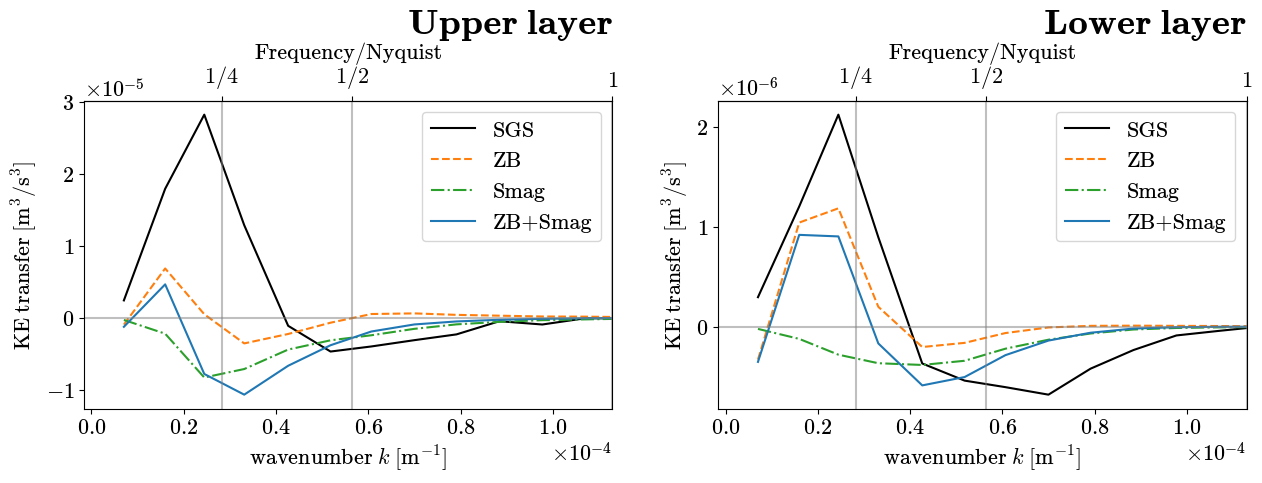

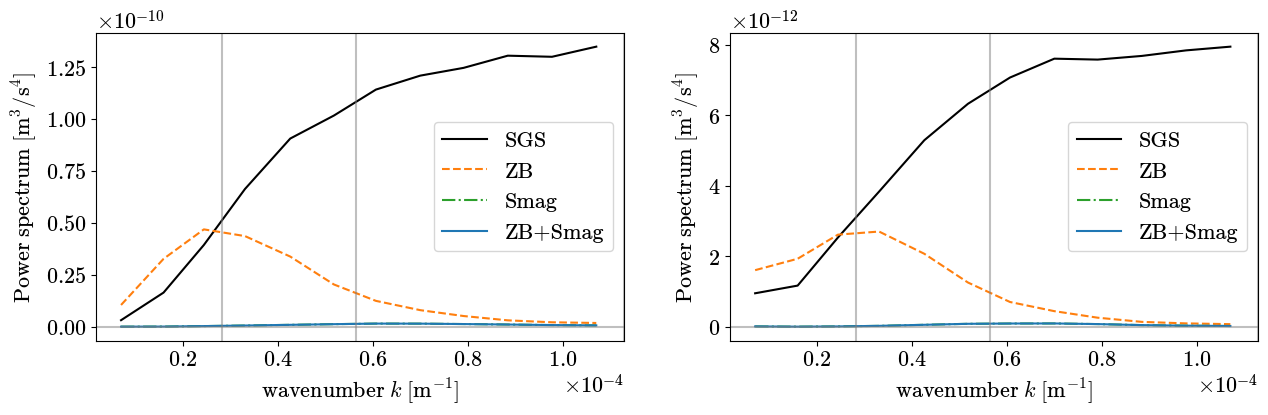

In [13]:
ds.plot_transfer('collocated')

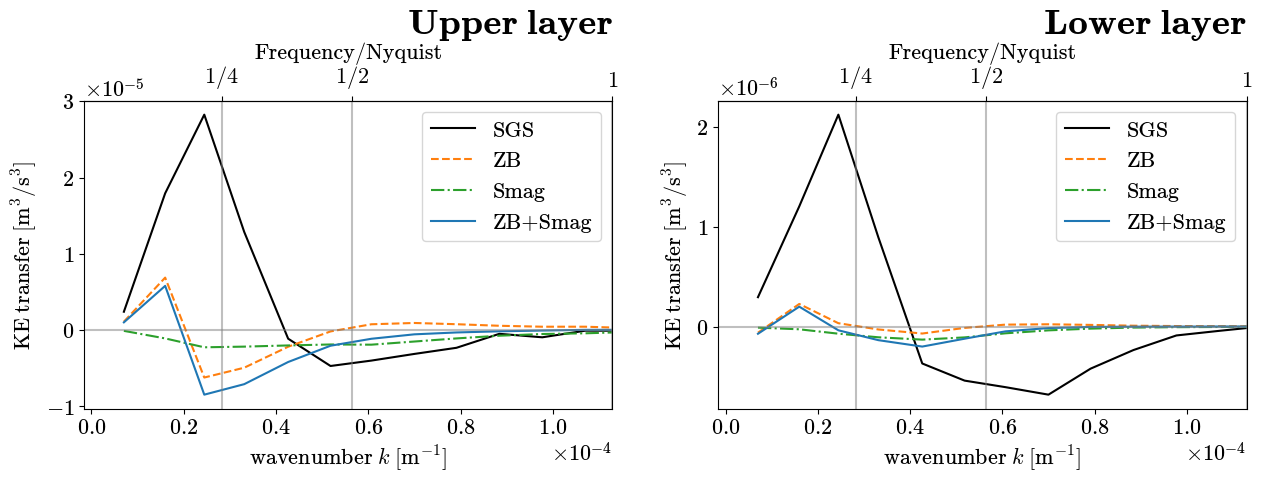

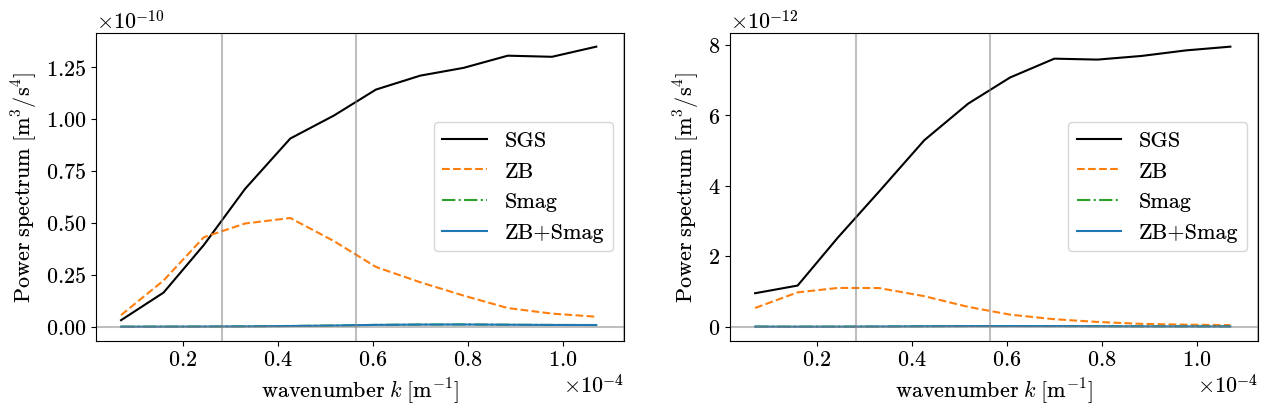

In [17]:
ds.plot_transfer('collocated-1.5')

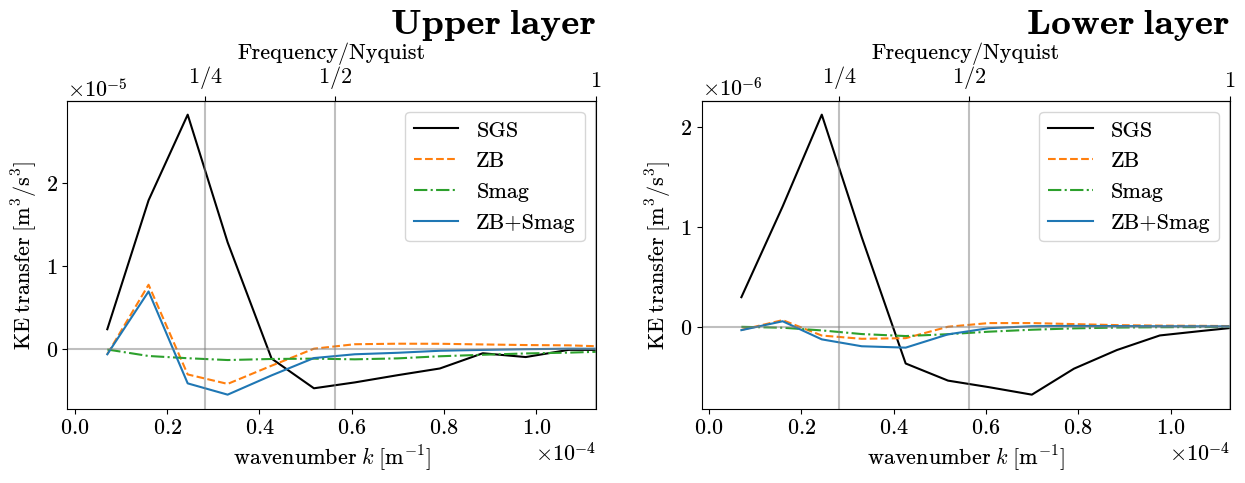

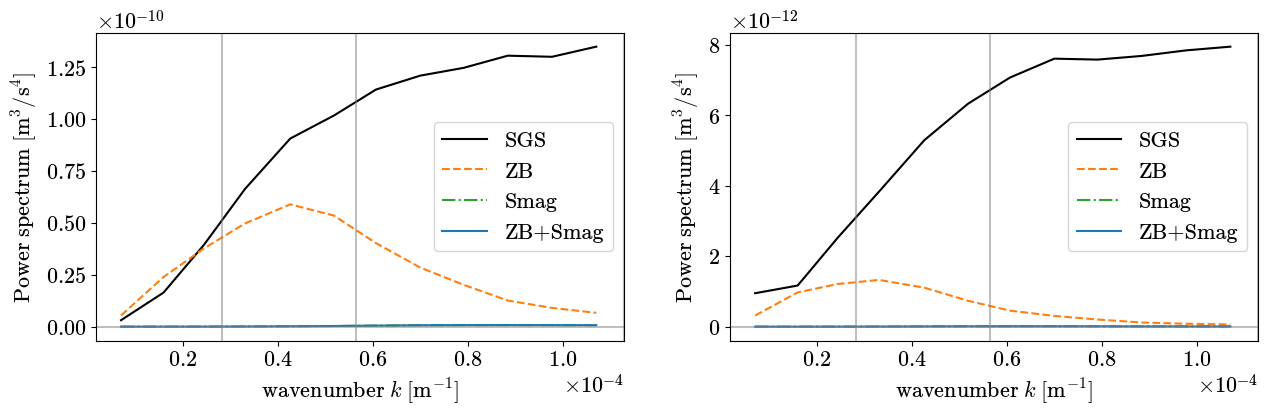

In [18]:
ds.plot_transfer('collocated-2.0')

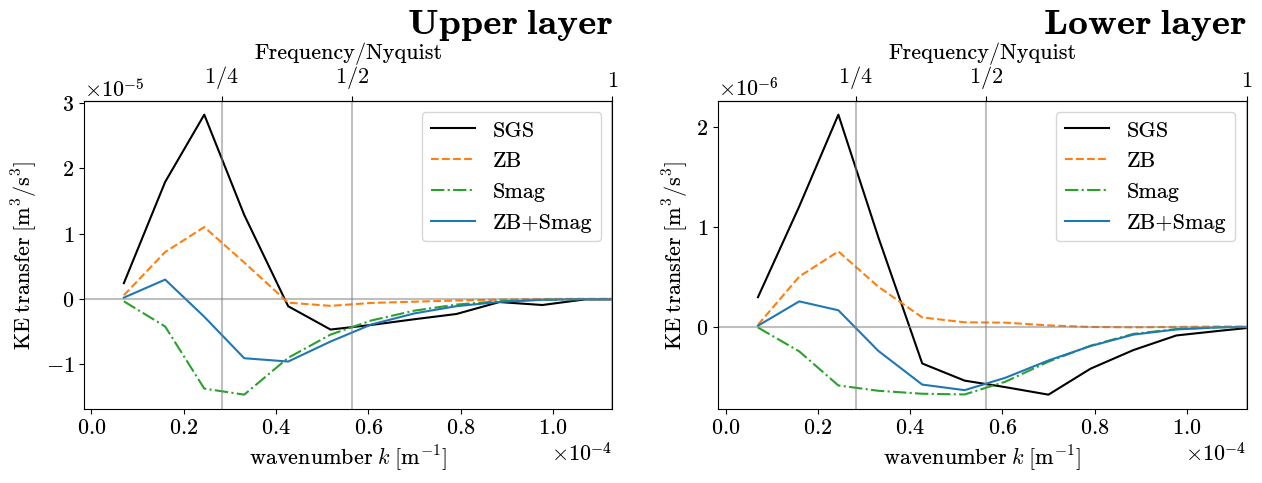

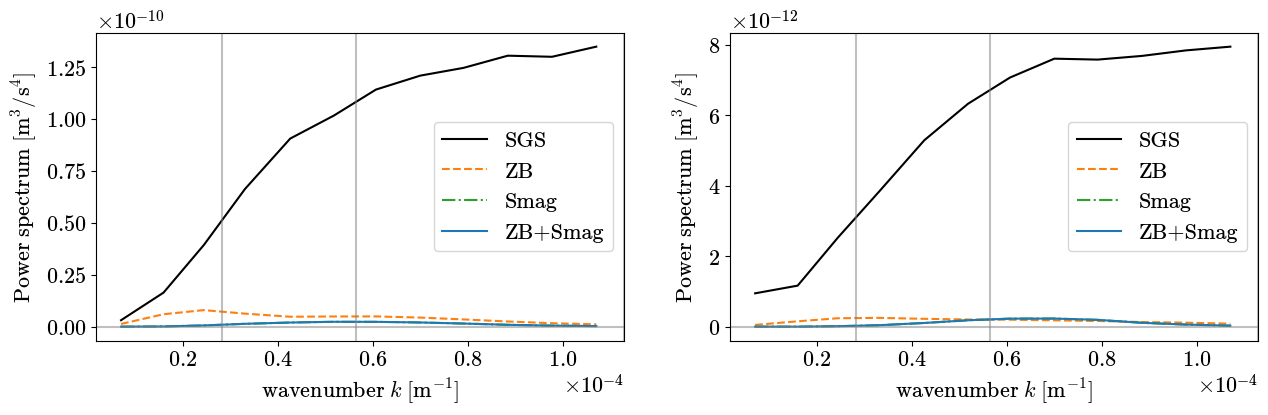

In [18]:
ds.plot_transfer('ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.06')

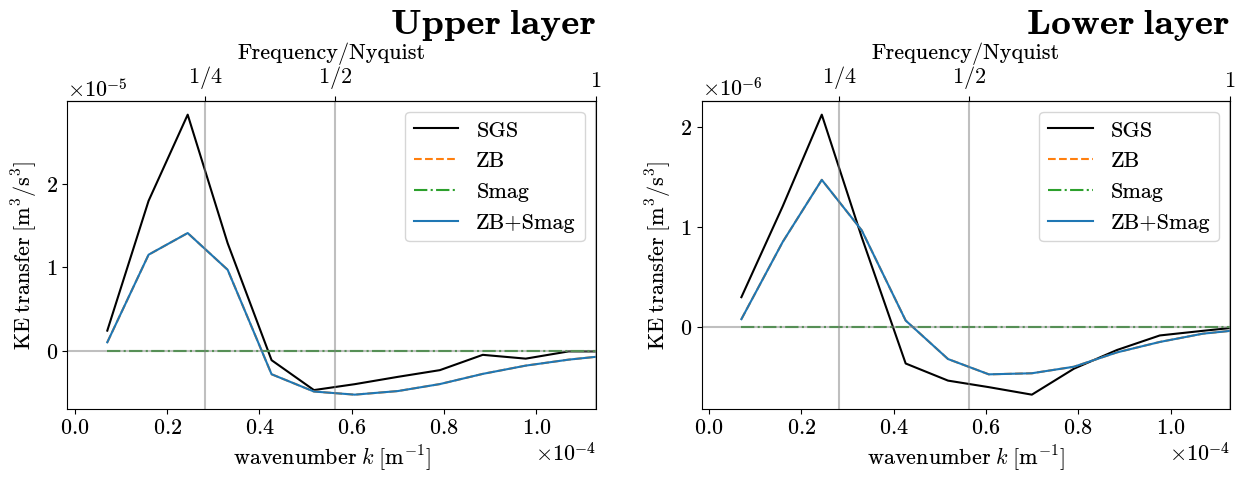

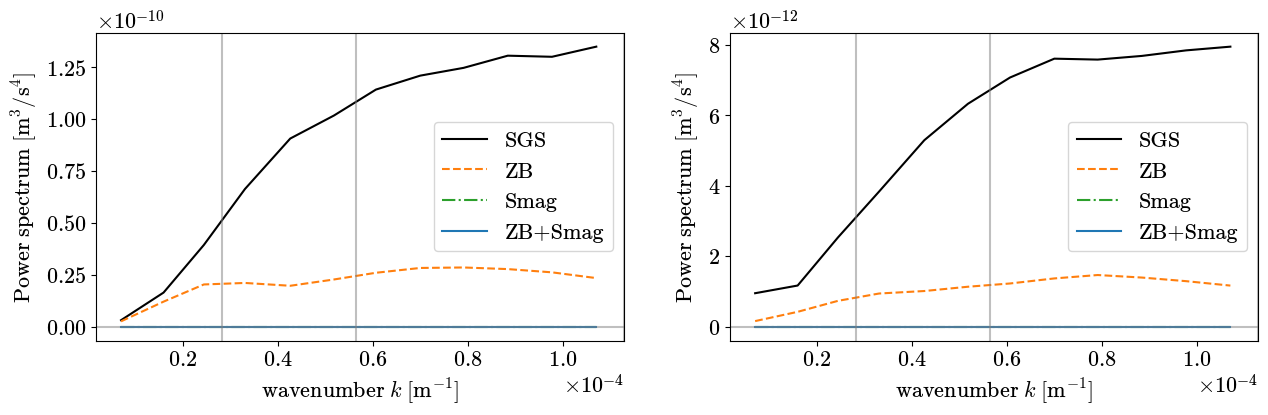

In [19]:
ds.plot_transfer('ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT-3')

# Collocated tuning

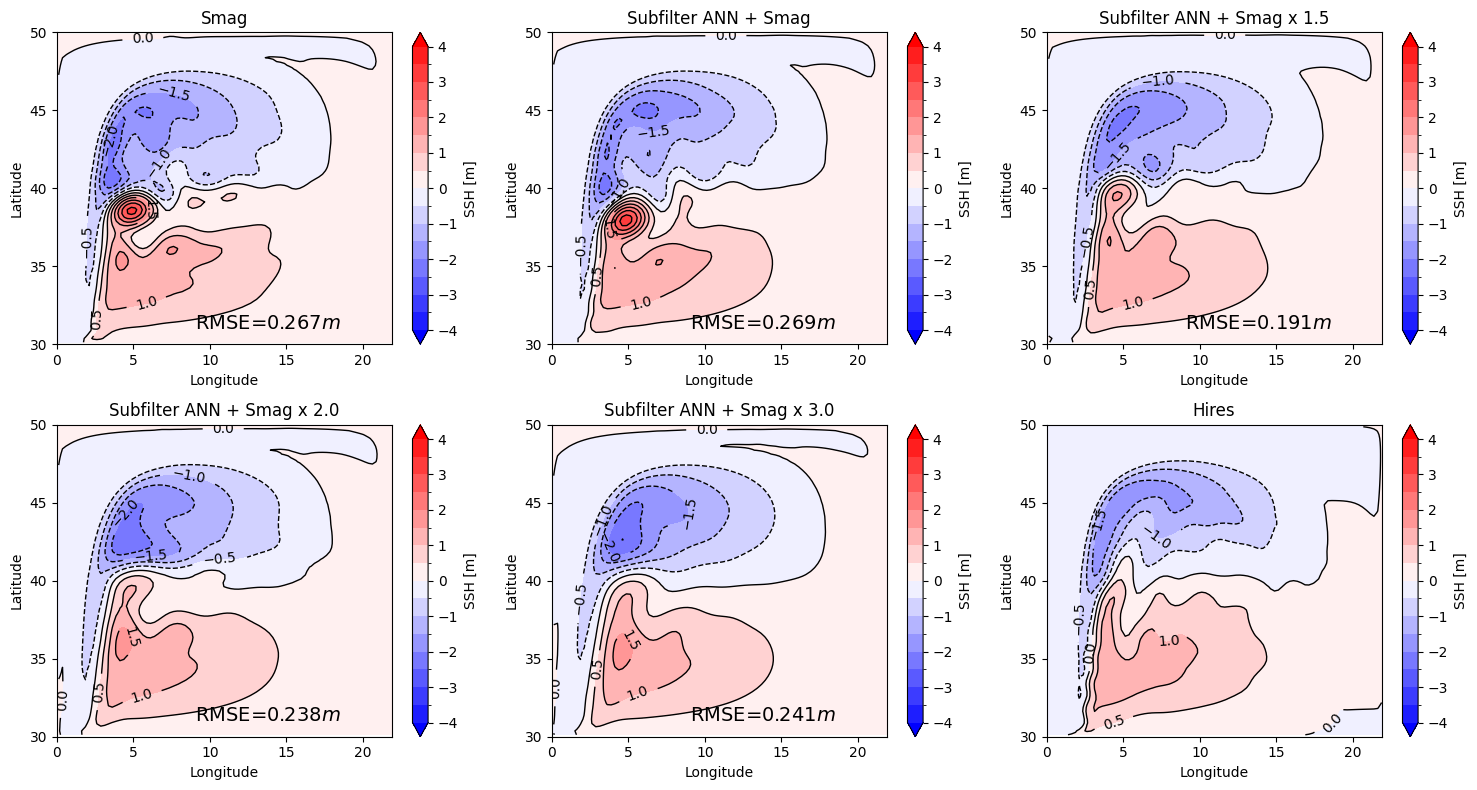

In [8]:
ds.plot_ssh(['R4', 'collocated', 'collocated-1.5', 'collocated-2.0', 'collocated-3.0', 'R64_R4'], 
            ['Smag', 'Subfilter ANN + Smag', 'Subfilter ANN + Smag x 1.5', 'Subfilter ANN + Smag x 2.0', 'Subfilter ANN + Smag x 3.0',  'Hires'])

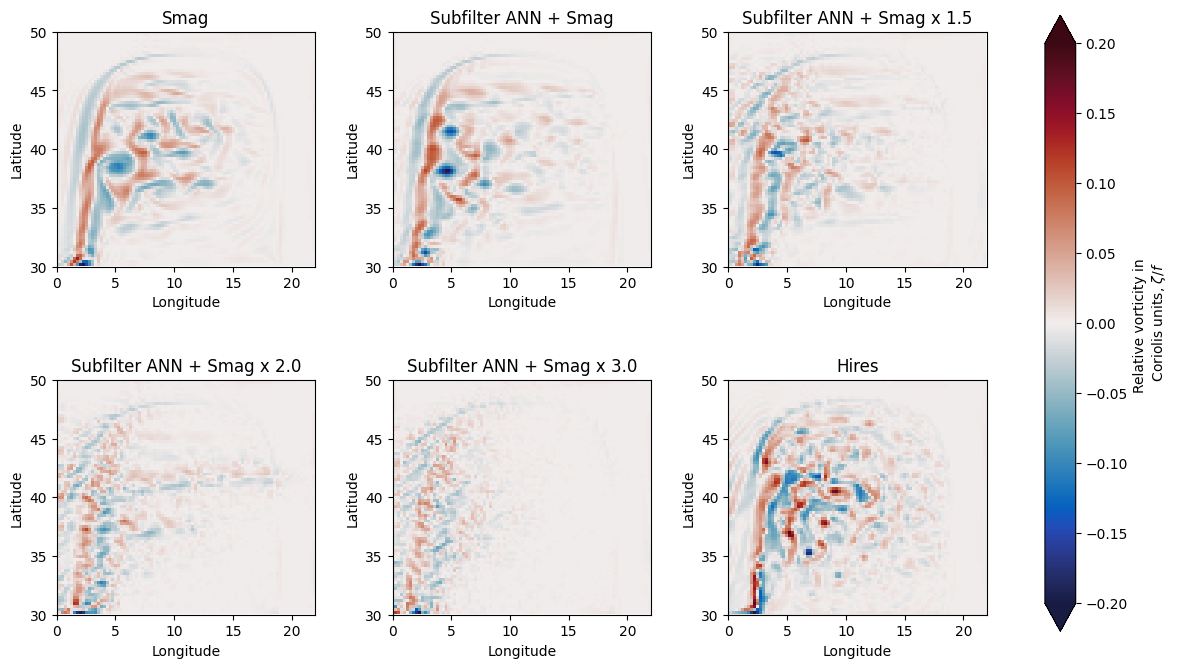

In [9]:
ds.plot_RV(['R4', 'collocated', 'collocated-1.5', 'collocated-2.0', 'collocated-3.0', 'R64_R4'], 
            ['Smag', 'Subfilter ANN + Smag', 'Subfilter ANN + Smag x 1.5', 'Subfilter ANN + Smag x 2.0', 'Subfilter ANN + Smag x 3.0',  'Hires'])

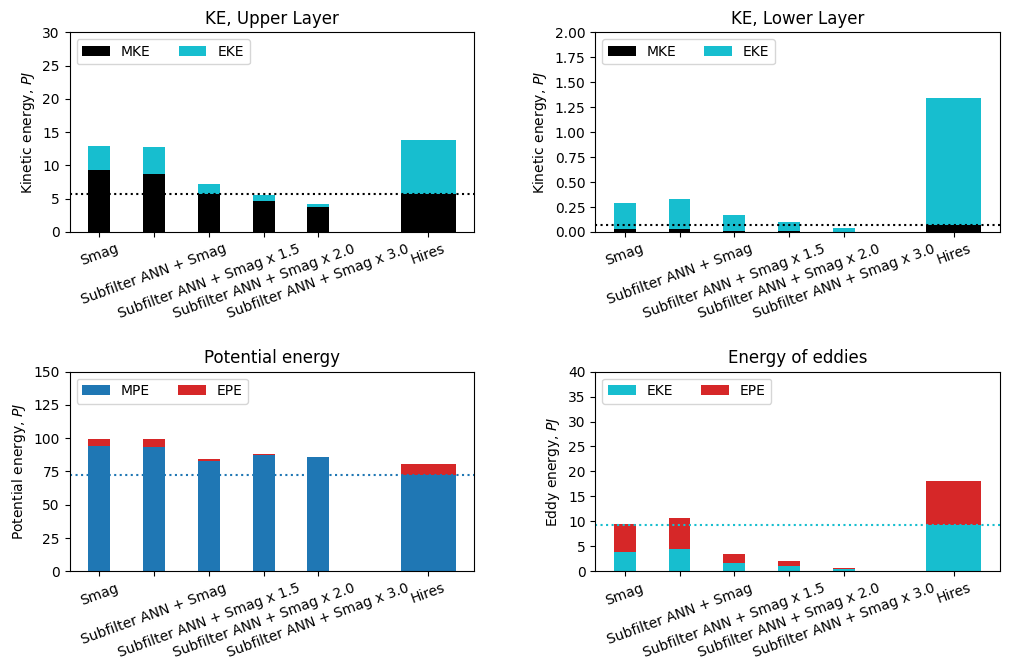

In [10]:
ds.plot_KE_PE(['R4', 'collocated', 'collocated-1.5', 'collocated-2.0', 'collocated-3.0', 'R64_R4'], 
            ['Smag', 'Subfilter ANN + Smag', 'Subfilter ANN + Smag x 1.5', 'Subfilter ANN + Smag x 2.0', 'Subfilter ANN + Smag x 3.0',  'Hires'])

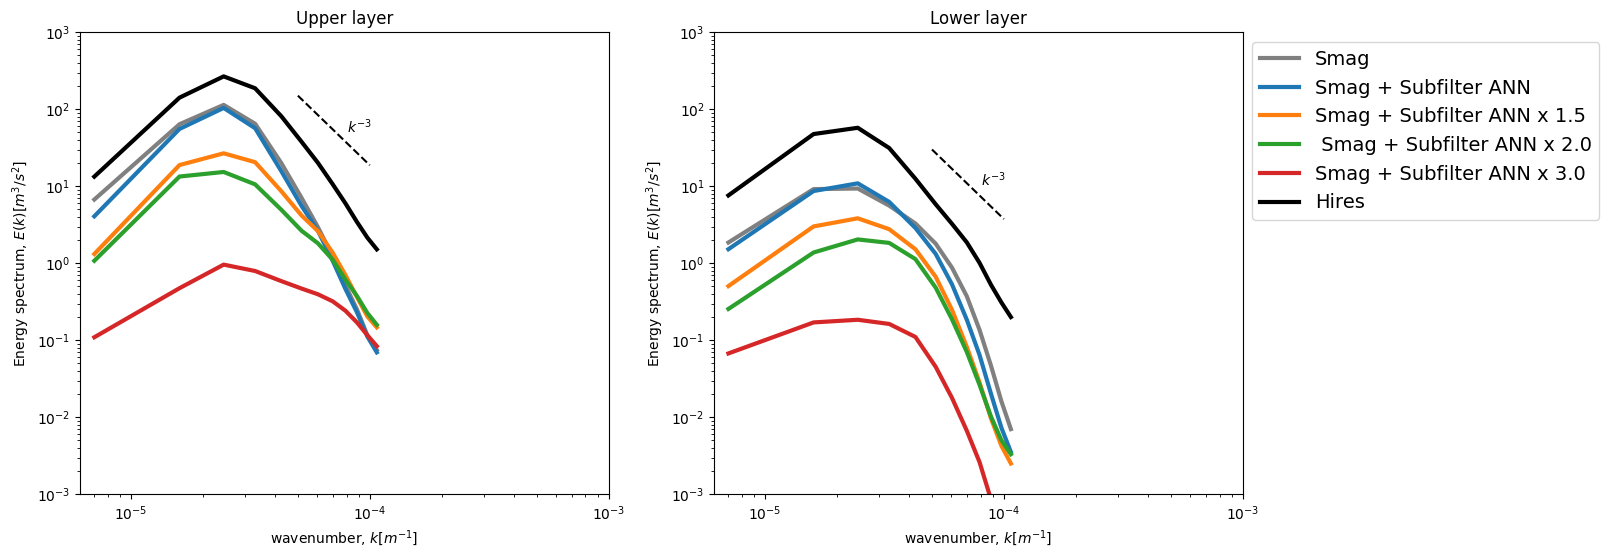

In [14]:
ds.plot_KE_spectrum(['R4', 'collocated', 'collocated-1.5', 'collocated-2.0', 'collocated-3.0', 'R64_R4'], 
            ['Smag', 'Smag + Subfilter ANN', 'Smag + Subfilter ANN x 1.5', ' Smag + Subfilter ANN x 2.0', 'Smag + Subfilter ANN x 3.0',  'Hires']);

Text(0.5, 1.0, '')

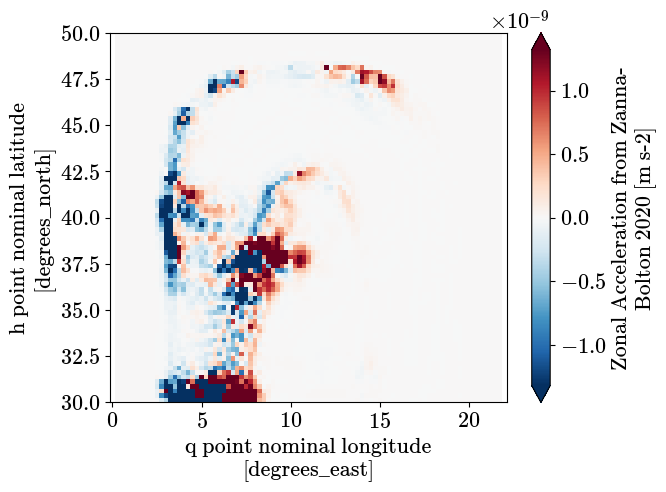

In [105]:
xr.open_dataset('/scratch/pp2681/mom6/CM26_Double_Gyre/collocated-vs-staggered/collocated/output/mom__0001_031.nc').ZB2020u.isel(Time=-1,zl=1).plot(robust=True)
plt.title('')

Text(0.5, 1.0, '')

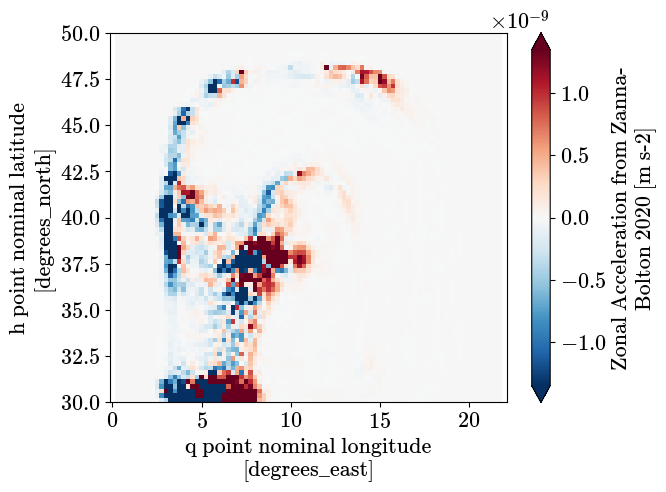

In [106]:
xr.open_dataset('/scratch/pp2681/mom6/CM26_Double_Gyre/collocated-vs-staggered/collocated-old-vorticity/output/mom__0001_031.nc').ZB2020u.isel(Time=-1,zl=1).plot(robust=True)
plt.title('')

Text(0.5, 1.0, '')

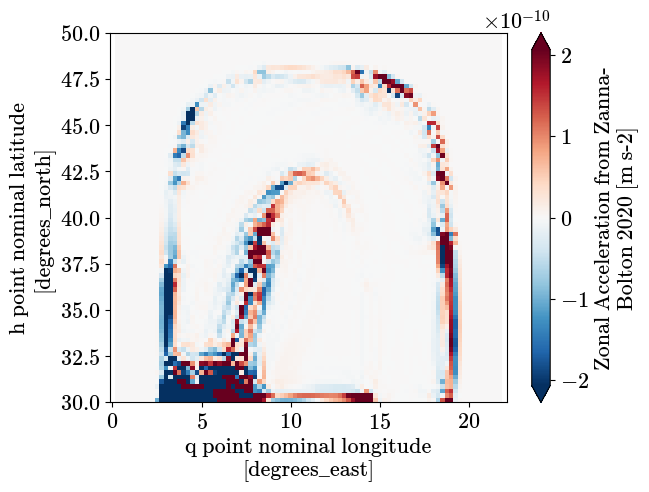

In [100]:
xr.open_dataset('/scratch/pp2681/mom6/CM26_Double_Gyre/generalization/hdn-64-64-R4/ZB-1.0-Cs-0.06/output/mom__0001_031.nc').ZB2020u.isel(Time=1,zl=1).plot(robust=True)
plt.title('')

Text(0.5, 1.0, '')

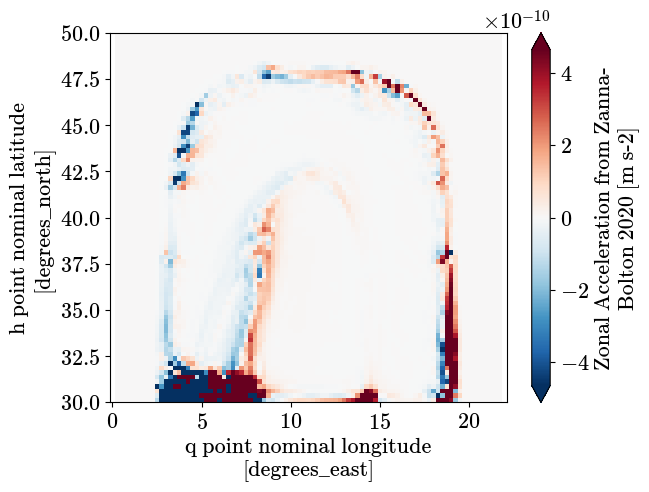

In [101]:
xr.open_dataset('/scratch/pp2681/mom6/CM26_Double_Gyre/collocated-vs-staggered/staggered/output/mom__0001_030.nc').ZB2020u.isel(Time=0,zl=1).plot(robust=True)
plt.title('')

In [171]:
from helpers.cm26 import read_datasets
from helpers.selectors import *
ds = read_datasets(['validate'],[15])['validate-15']

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15


In [226]:
slice = ds.select2d(zl=-1)

In [227]:
u0 = slice.data['u'].copy()
v0 = slice.data['v'].copy()

In [228]:
perturbed_slice = slice.perturb_velocities()

Correlation: 0.99829349464941
Relative Error: 0.10197067871055365
R2 =  0.9965742186996064
R2 max =  0.9965901048426778
Optinal scaling: 0.9960233217235267
Nans [test/control]: [0, 0]


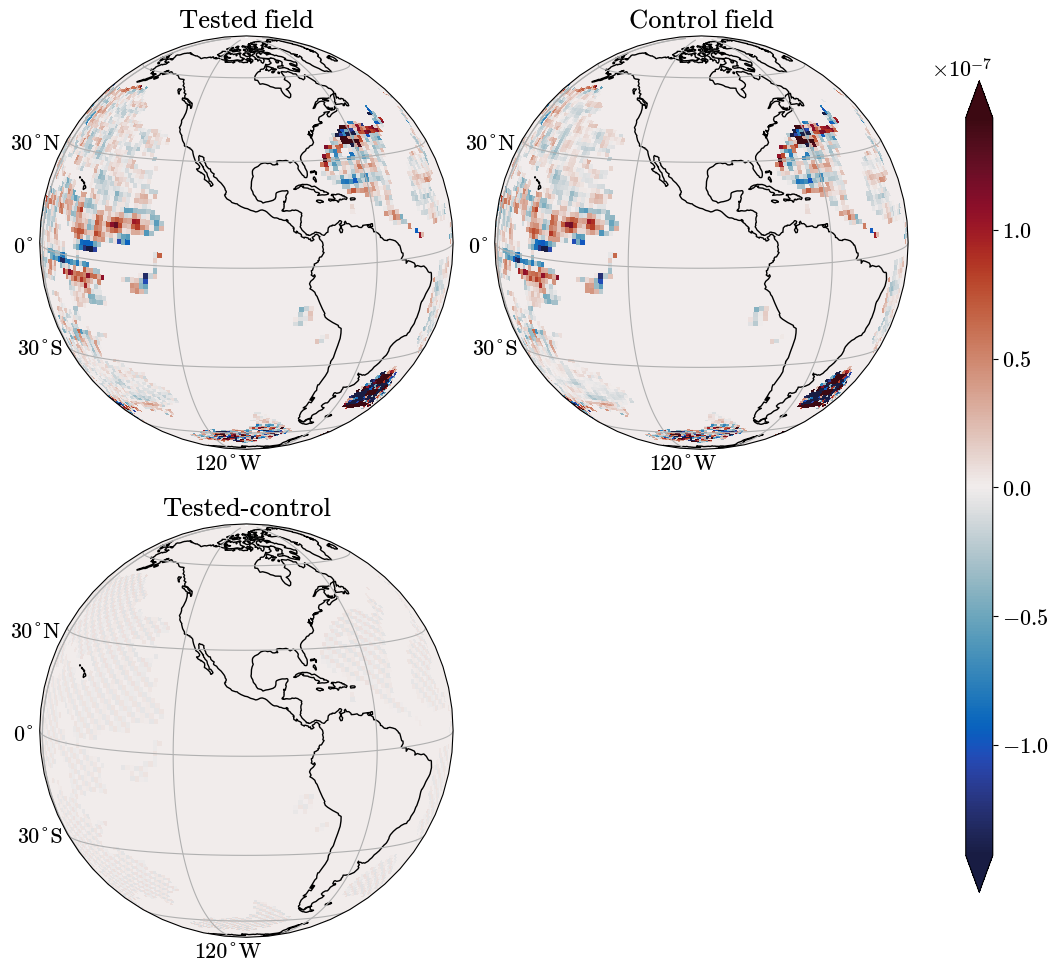

In [229]:
compare(perturbed_slice.state.velocity_gradients()[0],slice.state.velocity_gradients()[0],selector=select_globe)

Correlation: 0.9999999890695742
Relative Error: 0.0
R2 =  1.0
R2 max =  1.0
Optinal scaling: 1.0
Nans [test/control]: [0, 0]


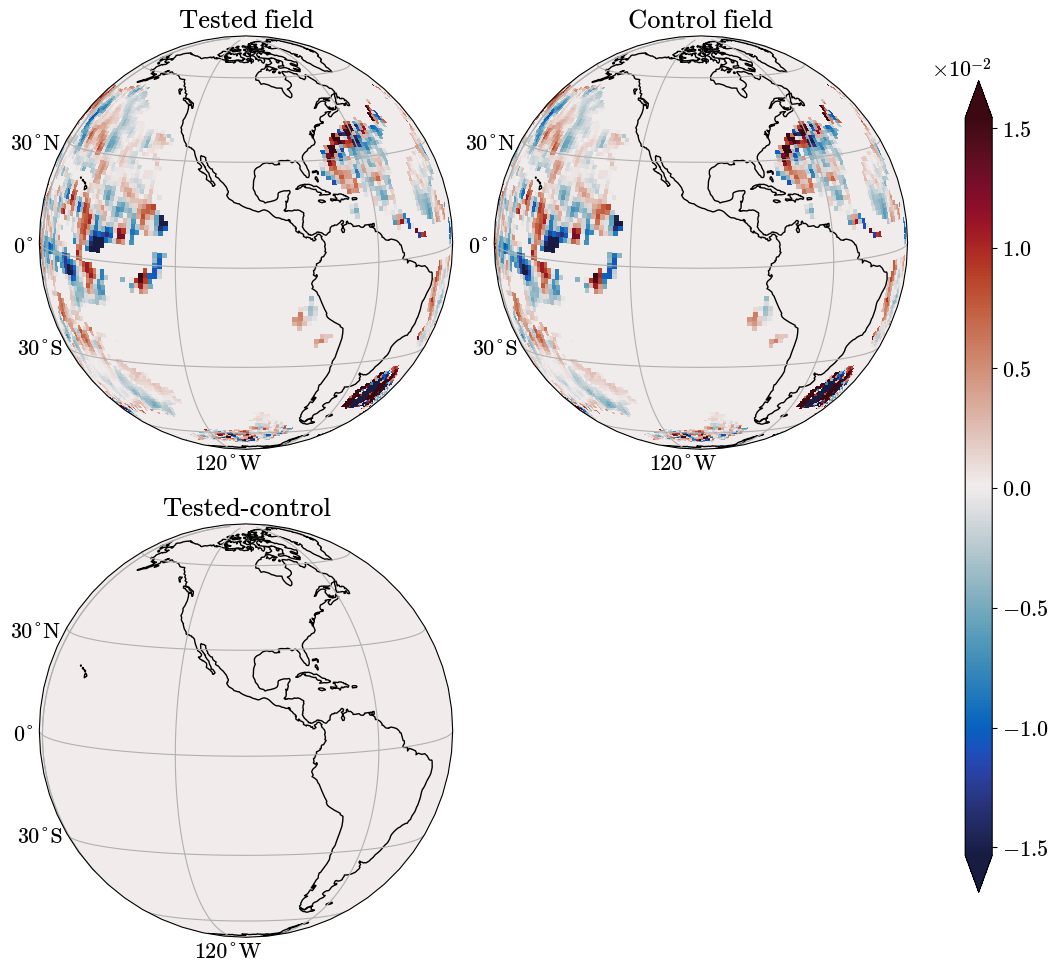

In [234]:
compare(v0,slice.data.v,selector=select_globe)

In [2]:
from helpers.train_ann import train_ANN
from helpers.train_ann_new import train_ANN_new

In [10]:
%time train_ANN(factors=[15])

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Factor: 15, depth: 0, MSE train/validate: [2.368056, 2.637065]
Iter/num_iters [1/10]. Iter time/Remaining time in seconds: [0.46/4.2]
Factor: 15, depth: 0, MSE train/validate: [2.139814, 2.304606]
Iter/num_iters [2/10]. Iter time/Remaining time in seconds: [0.44/3.6]
Factor: 15, depth: 0, MSE train/validate: [2.096065, 1.959039]
Iter/num_iters [3/10]. Iter time/Remaining time in seconds: [0.45/3.2]
Factor: 15, depth: 0, MSE train/validate: [2.136683, 2.498107]
Iter/num_iters [4/10]. Iter time/Remaining time in seconds: [0.45/2.7]
Factor: 15, depth: 0, MSE train/validate: [2.207758, 1.909555]
Iter/num_iters [5/10]. Iter time/Remaining time in seconds: [0.45/2.2]
Factor: 15, depth: 0, MSE train/validate: [2.391630, 2.167995]
Iter/num_iters [6/10]. Iter time/Remaining time in seconds: [0.45/1.8]
Factor: 15, depth: 0, MSE tr

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:       (factor: 1, depth: 1, iter: 10)
 Coordinates:
   * factor        (factor) int64 15
   * depth         (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train     (iter, factor, depth) float64 2.368 2.14 2.096 ... 1.806 1.71
     MSE_validate  (iter, factor, depth) float64 2.637 2.305 1.959 ... 1.89 2.164)

In [9]:
%time train_ANN_new(factors=[15])

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Factor: 15, depth: 0, MSE train/validate/waves: [1.904550, 2.508213, 0.000000]
Iter/num_iters [1/10]. Iter time/Remaining time in seconds: [0.46/4.1]
Factor: 15, depth: 0, MSE train/validate/waves: [1.824848, 2.148336, 0.000000]
Iter/num_iters [2/10]. Iter time/Remaining time in seconds: [0.46/3.6]
Factor: 15, depth: 0, MSE train/validate/waves: [1.564072, 1.587727, 0.000000]
Iter/num_iters [3/10]. Iter time/Remaining time in seconds: [0.66/3.7]
Factor: 15, depth: 0, MSE train/validate/waves: [2.305582, 1.664271, 0.000000]
Iter/num_iters [4/10]. Iter time/Remaining time in seconds: [0.46/3.0]
Factor: 15, depth: 0, MSE train/validate/waves: [1.790229, 1.703246, 0.000000]
Iter/num_iters [5/10]. Iter time/Remaining time in seconds: [0.46/2.5]
Factor: 15, depth: 0, MSE train/validate/waves: [1.883034, 2.316863, 0.000000]
Ite

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 1, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 1.905 1.825 ... 2.557 2.123
     MSE_plain_waves  (iter, factor, depth) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
     MSE_validate     (iter, factor, depth) float64 2.508 2.148 ... 1.929 1.608)

In [12]:
%time train_ANN_new(factors=[15])

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
ANN inference time: 0.3285853862762451
ANN inference time: 0.18680644035339355
Factor: 15, depth: 0, MSE train/validate/waves: [2.146137, 2.032977, 0.000000]
Iter/num_iters [1/10]. Iter time/Remaining time in seconds: [0.73/6.6]
ANN inference time: 0.2414853572845459
ANN inference time: 0.17991375923156738
Factor: 15, depth: 0, MSE train/validate/waves: [1.374758, 1.614169, 0.000000]
Iter/num_iters [2/10]. Iter time/Remaining time in seconds: [0.45/4.7]
ANN inference time: 0.23490405082702637
ANN inference time: 0.18010473251342773
Factor: 15, depth: 0, MSE train/validate/waves: [1.765204, 1.783030, 0.000000]
Iter/num_iters [3/10]. Iter time/Remaining time in seconds: [0.45/3.8]
ANN inference time: 0.23542261123657227
ANN inference time: 0.1792442798614502
Factor: 15, depth: 0, MSE train/validate/waves: [1.674762, 1.9341

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 1, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 2.146 1.375 ... 1.586 1.553
     MSE_plain_waves  (iter, factor, depth) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
     MSE_validate     (iter, factor, depth) float64 2.033 1.614 ... 1.487 1.342)

In [119]:
%time train_ANN_new(factors=[15])

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
ANN inference time: 0.27948784828186035
MSE time:  0.00039958953857421875
Backward+optimizer.step() time: 0.005969047546386719
ANN inference time: 0.20842981338500977
MSE time:  0.00036787986755371094
Factor: 15, depth: 0, MSE train/validate/waves: [2.067053, 1.946575, 0.000000]
Iter/num_iters [1/10]. Iter time/Remaining time in seconds: [0.52/4.7]
ANN inference time: 0.25926828384399414
MSE time:  0.0004029273986816406
Backward+optimizer.step() time: 0.005950212478637695
ANN inference time: 0.19681429862976074
MSE time:  0.0003905296325683594
Factor: 15, depth: 0, MSE train/validate/waves: [1.739705, 2.631439, 0.000000]
Iter/num_iters [2/10]. Iter time/Remaining time in seconds: [0.49/4.1]
ANN inference time: 0.24949049949645996
MSE time:  0.00040078163146972656
Backward+optimizer.step() time: 0.005631208419799805
ANN i

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 1, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 2.067 1.74 ... 1.573 2.808
     MSE_plain_waves  (iter, factor, depth) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
     MSE_validate     (iter, factor, depth) float64 1.947 2.631 ... 1.805 2.456)

In [121]:
%time train_ANN_new(factors=[15], short_waves_dissipation=True)

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Applying perturbation time:  0.024445772171020508
Smagorinsky evaluation time:  0.5366804599761963
ANN inference time: 0.2793288230895996
MSE time:  0.0006263256072998047
ANN perturbed inference time: 0.37142467498779297
MSE_plane_waves time: 0.0004322528839111328
Backward+optimizer.step() time: 0.012353658676147461
ANN inference time: 0.19887232780456543
MSE time:  0.0004024505615234375
Factor: 15, depth: 0, MSE train/validate/waves: [1.974961, 3.205052, 4.325624]
Iter/num_iters [1/10]. Iter time/Remaining time in seconds: [1.46/13.1]
Applying perturbation time:  0.013952493667602539
Smagorinsky evaluation time:  0.5153756141662598
ANN inference time: 0.26898193359375
MSE time:  0.0002415180206298828
ANN perturbed inference time: 0.2785780429840088
MSE_plane_waves time: 0.000446319580078125
Backward+optimizer.step() tim

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 1, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 1.975 1.976 ... 2.449 1.707
     MSE_plain_waves  (iter, factor, depth) float64 4.326 1.462 ... 2.884 1.783
     MSE_validate     (iter, factor, depth) float64 3.205 3.111 ... 2.867 2.457)

In [122]:
train_ANN_new(factors=[15], short_waves_dissipation=True, symmetries='All')

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Applying perturbation time:  0.0169677734375
Smagorinsky evaluation time:  0.5202069282531738
ANN inference time: 0.2644171714782715
MSE time:  0.00024080276489257812
ANN perturbed inference time: 0.2627530097961426
MSE_plane_waves time: 0.00044274330139160156
Backward+optimizer.step() time: 0.011835336685180664
ANN inference time: 0.2704811096191406
MSE time:  0.0005135536193847656
ANN perturbed inference time: 0.27016377449035645
MSE_plane_waves time: 0.00047779083251953125
Backward+optimizer.step() time: 0.011897802352905273
ANN inference time: 0.32230114936828613
MSE time:  0.00024819374084472656
ANN perturbed inference time: 0.256577730178833
MSE_plane_waves time: 0.0004532337188720703
Backward+optimizer.step() time: 0.012001514434814453
ANN inference time: 0.32679295539855957
MSE time:  0.0004088878631591797
ANN pe

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 1, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 1.661 1.5 ... 1.418 1.215
     MSE_plain_waves  (iter, factor, depth) float64 1.765 1.239 ... 0.8024 0.6055
     MSE_validate     (iter, factor, depth) float64 1.666 1.567 ... 1.25 1.572)

In [124]:
train_ANN_new(factors=[15], short_waves_dissipation=True, symmetries='All')

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Applying perturbation time:  0.013998031616210938
Smagorinsky lazy time:  0.39264893531799316
Smagorinsky hard time:  0.11632275581359863
ANN inference time: 0.28175902366638184
MSE time:  0.0003299713134765625
ANN perturbed inference time: 0.2536747455596924
MSE_plane_waves time: 0.0004897117614746094
Backward+optimizer.step() time: 0.012528419494628906
ANN inference time: 0.006842374801635742
MSE time:  0.0002562999725341797
ANN perturbed inference time: 0.019112586975097656
MSE_plane_waves time: 0.0002951622009277344
Backward+optimizer.step() time: 0.011129617691040039
ANN inference time: 0.009148120880126953
MSE time:  0.000209808349609375
ANN perturbed inference time: 0.006948232650756836
MSE_plane_waves time: 0.00028586387634277344
Backward+optimizer.step() time: 0.010922908782958984
ANN inference time: 0.006742000

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 1, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 2.514 2.924 ... 2.17 1.969
     MSE_plain_waves  (iter, factor, depth) float64 0.9971 0.9862 ... 0.8804
     MSE_validate     (iter, factor, depth) float64 2.483 2.522 ... 1.576 1.836)

In [126]:
train_ANN_new(factors=[15], short_waves_dissipation=True, symmetries='All')

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Applying perturbation time:  0.013063192367553711
Smagorinsky lazy time:  0.3844757080078125
Smagorinsky hard time:  0.11405062675476074
ANN inference time: 0.2511105537414551
MSE time:  0.00035762786865234375
ANN perturbed inference time: 0.2480015754699707
MSE_plane_waves time: 0.0005853176116943359
Backward+optimizer.step() time: 0.011340141296386719
ANN inference time: 0.006898403167724609
MSE time:  0.00019598007202148438
ANN perturbed inference time: 0.008527278900146484
MSE_plane_waves time: 0.0002582073211669922
Backward+optimizer.step() time: 0.010595321655273438
ANN inference time: 0.008945465087890625
MSE time:  0.0002086162567138672
ANN perturbed inference time: 0.011150360107421875
MSE_plane_waves time: 0.000255584716796875
Backward+optimizer.step() time: 0.010742902755737305
ANN inference time: 0.0064628124

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 1, depth: 1, iter: 10)
 Coordinates:
   * factor           (factor) int64 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 2.622 1.757 ... 1.103 1.452
     MSE_plain_waves  (iter, factor, depth) float64 3.235 3.878 ... 1.831 0.786
     MSE_validate     (iter, factor, depth) float64 3.996 1.686 ... 1.439 1.439)

In [128]:
train_ANN_new(factors=[4,9,12,15], time_iters=1)

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
ANN inference time: 1.2704837322235107
MSE time:  0.0006518363952636719
Backward+optimizer.step() time: 0.05721235275268555
ANN inference time: 0.5949921607971191
MSE time:  0.0005333423614501953
Factor: 4, depth: 0, MSE train/validate/waves: [9.265887, 9.143535, 0.000000]
ANN inference time: 0.542769193649292
MSE time:  0.0004327

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 4, depth: 1, iter: 1)
 Coordinates:
   * factor           (factor) int64 4 9 12 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 9.266 2.462 2.208 1.428
     MSE_plain_waves  (iter, factor, depth) float64 0.0 0.0 0.0 0.0
     MSE_validate     (iter, factor, depth) float64 9.144 2.741 3.027 1.606)

In [129]:
train_ANN_new(factors=[4,9,12,15], symmetries='All', time_iters=1)

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
ANN inference time: 1.2990853786468506
MSE time:  0.0013952255249023438
Backward+optimizer.step() time: 0.08710551261901855
ANN inference time: 0.12485146522521973
MSE time:  0.0005681514739990234
Backward+optimizer.step() time: 0.0749351978302002
ANN inference time: 0.35948657989501953
MSE time:  0.0005280971527099609
Backward+op

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 4, depth: 1, iter: 1)
 Coordinates:
   * factor           (factor) int64 4 9 12 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 9.536 2.731 2.536 1.699
     MSE_plain_waves  (iter, factor, depth) float64 0.0 0.0 0.0 0.0
     MSE_validate     (iter, factor, depth) float64 9.457 3.21 2.188 2.004)

In [130]:
train_ANN_new(factors=[4,9,12,15], symmetries='All', short_waves_dissipation=True, time_iters=1)

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-4
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-9
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-12
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/Gauss-FGR3/factor-15
Applying perturbation time:  0.22116947174072266
Smagorinsky lazy time:  1.3485217094421387
Smagorinsky hard time:  0.6132171154022217
ANN inference time: 0.86641526222229
MSE time:  0.0010571479797363281
ANN perturbed inference time: 0.819307804107666
MSE_plane_waves time: 0.0007526874542236328
Backward+optimizer.step() time: 0.1

(ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=1, bias=True)
   )
 ),
 ANN(
   (layers): Sequential(
     (0): Linear(in_features=27, out_features=20, bias=True)
     (1): Linear(in_features=20, out_features=2, bias=True)
   )
 ),
 None,
 <xarray.Dataset>
 Dimensions:          (factor: 4, depth: 1, iter: 1)
 Coordinates:
   * factor           (factor) int64 4 9 12 15
   * depth            (depth) int64 0
 Dimensions without coordinates: iter
 Data variables:
     MSE_train        (iter, factor, depth) float64 21.73 4.285 2.792 3.493
     MSE_plain_waves  (iter, factor, depth) float64 2.774 1.13 2.008 2.748
     MSE_validate     (iter, factor, depth) float64 22.3 6.39 2.846 2.475)